In [87]:
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import numpy as np
import sys
sys.path.append('./../gp_sinkhorn/')
from SDE_solver import solve_sde_RK
from utils import plot_trajectories_2
import matplotlib.pyplot as plt
from MLE_drift import *
import torch

from celluloid import Camera
from IPython.display import HTML
import math
from plotly.graph_objs import *


In [61]:
result=pd.read_pickle("nice_well_trajectory_20_iters_both_prior.pkl")

In [146]:
feature_x = np.arange(-1.5, 1.5, 0.1)
feature_y = np.arange(-1.5, 1.5, 0.1)
x, y = np.meshgrid(feature_x, feature_y)

delta = 0.35
fac = 1
z = (5/2.0)*(x**2-1)**2+y**2 +  fac*np.exp(-(  x**2 +y**2)/delta)/delta
 
theta = np.linspace(0, 2*np.pi, 100)

r = 2
n = [1, 10, 20, 30, 40, 50, 60]
r = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
x1 = np.concatenate(circle_points(r, n,center=-1))
x2 = np.concatenate(circle_points(r, n,center=1))

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

plot_list = [go.Surface(x=x,y=y,z=z/2,opacity=0.2),
             go.Scatter3d(x=x1[:,0],y=x1[:,1],z=[0.1]*x1.shape[0],opacity=0.1,text=["π0"],marker=dict(size=5)),
             go.Scatter3d(x=x2[:,0],y=x2[:,1],z=[0.1]*x1.shape[0],opacity=0.1,text=["π1"],marker=dict(size=5))
            ]
for i in range(10):
    tmp = result[-1][1][i,:,:]
    x_s = tmp[:,0]
    y_s = tmp[:,1]
    z_s = (5/2.0)*(x_s**2-1)**2+y_s**2 +  fac*np.exp(-(  x_s**2 +y_s**2)/delta)/delta
    plot_list.append(go.Scatter3d(x=x_s, y=y_s, z=z_s/2,
                            marker=dict(
                                size=1,
                                color=z_s/2,
                                colorscale='Viridis',
                            ),line=dict(
                                
                                width=3
                    )))

fig = go.Figure(data=plot_list, layout=layout)
#fig.update_zaxes(type="log")
fig.update_layout(
    scene = dict(
        xaxis = dict(showgrid=False,visible= False), #
                     yaxis = dict(showgrid=False,visible= False),
                     zaxis = dict(showgrid=False,visible= False))) 


#fig.update_layout(

#    autosize=False,
#    width=800,
#    height=300,
#)
fig.show()

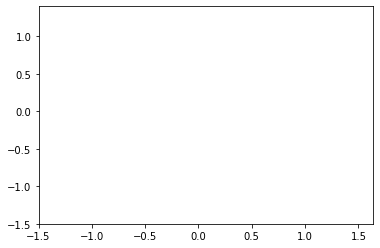

In [27]:
fig = plt.figure()
N = 50
camera = Camera(fig)
for i in range(N):    
    plt.contourf(feature_x,feature_y,z)
    plt.scatter(M[:,i,0].detach(),M[:,i,1].detach())
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())